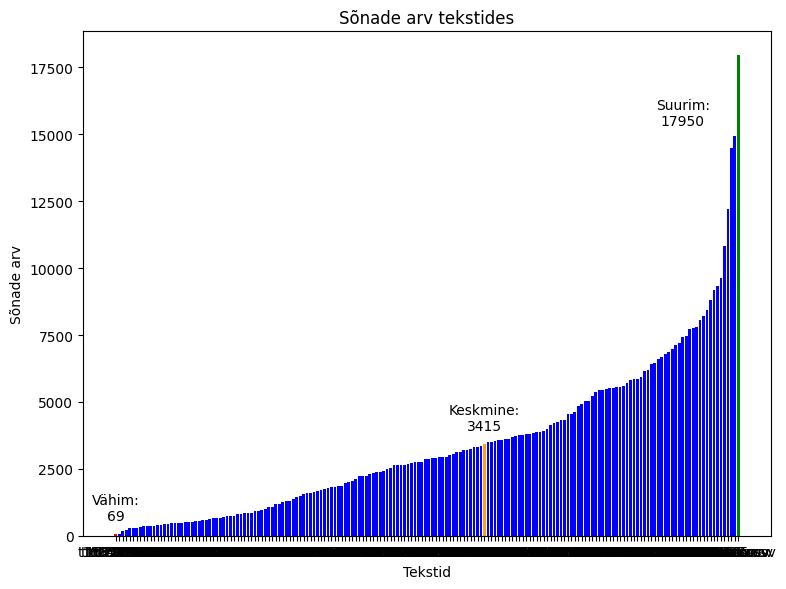

In [1]:
# ANALYZE TEXT DATA INFO AND PLOT
import os
import pandas as pd
import matplotlib.pyplot as plt

directory = "pre_processed_text_data"

word_counts = []
file_names = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        data = pd.read_csv(filepath, delimiter=";")
        word_counts.append(len(data))
        file_names.append(filename)

df = pd.DataFrame({"File Name": file_names, "Word Count": word_counts})

average_word_count = df["Word Count"].mean()

df_sorted = df.sort_values("Word Count")

df["Difference From Average"] = abs(df["Word Count"] - average_word_count)


lowest_word_file = df_sorted.iloc[0]
highest_word_file = df_sorted.iloc[-1]
closest_to_average_file = df[
    df["Difference From Average"] == df["Difference From Average"].min()
].iloc[0]


plt.figure(figsize=(8, 6))
plt.subplots_adjust(top=5)
colors = [
    "blue"
    if file != lowest_word_file["File Name"]
    and file != highest_word_file["File Name"]
    and file != closest_to_average_file["File Name"]
    else "red"
    if file == lowest_word_file["File Name"]
    else "green"
    if file == highest_word_file["File Name"]
    else "orange"
    for file in df_sorted["File Name"]
]
plt.bar(df_sorted["File Name"], df_sorted["Word Count"], color=colors)
plt.xlabel("Tekstid")
plt.ylabel("Sõnade arv")
plt.title("Sõnade arv tekstides")


plt.annotate(
    f'Vähim:\n{lowest_word_file["Word Count"]}',
    (lowest_word_file["File Name"], lowest_word_file["Word Count"]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
)

plt.annotate(
    f'Suurim:\n{highest_word_file["Word Count"]}',
    (highest_word_file["File Name"], highest_word_file["Word Count"]),
    textcoords="offset points",
    xytext=(-40, -50),
    ha="center",
)
plt.annotate(
    f'Keskmine:\n{int(closest_to_average_file["Word Count"])}',
    (closest_to_average_file["File Name"], closest_to_average_file["Word Count"]),
    textcoords="offset points",
    xytext=(0, 10),
    ha="center",
)

plt.tight_layout()
plt.show()
